In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Problem1 
### Simple case
#### single pulse converted to gate operation in rotating frame
$$
H_{rf,d}(t)=-\frac{1}{2}\Omega V_0 S_{\theta}(t)
\begin{pmatrix}
0 & e^{i(\delta\omega t+\phi)} \\
e^{-i(\delta\omega t+\phi)} & 0 
\end{pmatrix} \qquad (90)
$$

$$
H_{rf,d}(t)=-\frac{\Omega}{2}V_0 S_{\theta}(t) \Big[ \cos(\delta\omega t+\phi)\sigma_x-\sin(\delta\omega t+\phi)\sigma_y \Big] \quad (1)
$$

$$
\frac{\partial}{\partial t}U(t) = -\frac{i}{\hbar}H(t)U(t) \quad(2)
$$

$$
U=\hat{T}\exp{({-i/{\hslash}\int_0^t \tilde{H_d}(t')dt'})} \quad (3)
$$

The solution for U in (2) is time-ordered exponential (3)

(90) is the driving hamiltonian in rotating frame

아래와 같은 방식으로 $U(t)$를 계산하면 자동적으로 time-ordering을 만족한다

$$U(t_{n+1})= U(t_n)+\frac{dU}{dt}|_{t_n}\Delta t $$
$$\frac{dU}{dt}=-\frac{i}{\hbar}H(t)U(t)$$

In [99]:
#time_step=1e-4

def make_U(H, time_step):
    """
    PARAMETER
        Hamiltonian : function of t
        time_step : float
    RETURNS
        U : function of t
    """
    hbar = 1.
    I = np.identity(2,dtype="complex128")
    
    def U(t):
        total = I #U(t=0)
        check = [I]
        times = np.arange(start=0,stop=t,step=time_step)
        for time in times:
            derivative = (-1j/hbar)*np.matmul(H(time),total)*time_step
            total = total + derivative
            check.append(total) 
        return total, np.array(check)
        

    return U

In [100]:
times = np.arange(start=0,stop=20.,step=1e-4)
times[-1]

19.9999

total += derivative이 total=total + derivative 이랑 똑같아야 하는거 아닌가 이해가안가네 

In [101]:
def make_H_d(Omega,V_0,delta_omega,phi,s):
    """
    PARAMETER
        -s:function 
    RETURN 
        -H: time-dependent Hamiltonian (Hermitian for all t)
    """ 
    
    def H(t):
        matrix=np.zeros((2,2),dtype='complex128')
        matrix[0][1]=np.exp((1j)*(delta_omega*t+phi))
        matrix[1][0]=np.exp((-1j)*(delta_omega*t+phi))
    
        return (-0.5)*Omega*V_0*s(t)*matrix
    
    return H
 

In [102]:
def make_H_d2(Omega, V_0, delta_omega, phi, s):
    
    sigma_x = np.array([[0,1],[1,0]], dtype = "complex128")
    sigma_y = np.array([[0,-1j],[1j,0]], dtype = "complex128")

    def H(t):
        matrix=np.cos(delta_omega*t + phi) * sigma_x - np.sin(delta_omega*t + phi) * sigma_y
        return (-0.5)*Omega*V_0*s(t)*matrix
    return H

In [103]:
def s(t):
    return np.sin(((2*np.pi)/20.)*t) 

In [104]:
testH=make_H_d(Omega=1.,V_0=1.,delta_omega=0.001,phi=0.1,s=s)

In [105]:
testH2=make_H_d2(Omega=1., V_0=1., delta_omega=0.001, phi=0.1,s=s)

In [106]:
testU = make_U(testH,1e-4)

In [107]:
testU2 = make_U(testH2,1e-4)

In [108]:
matrix, check = testU(20.)

In [109]:
matrix2, check2 = testU2(20.)

In [110]:
matrix

array([[ 1.00010157e+00+6.84637788e-03j,  1.30233327e-04+1.43837271e-05j],
       [-1.30233327e-04+1.43837271e-05j,  1.00010157e+00-6.84637788e-03j]])

In [111]:
matrix2

array([[ 1.00010157e+00+6.84637788e-03j,  1.30233327e-04+1.43837271e-05j],
       [-1.30233327e-04+1.43837271e-05j,  1.00010157e+00-6.84637788e-03j]])

In [112]:
matrix_dagger = np.matrix.getH(matrix)
np.matmul(matrix,matrix_dagger)

array([[1.00025003e+00-1.09014259e-19j, 1.87112063e-20+2.96952785e-22j],
       [1.87112063e-20+2.64033799e-22j, 1.00025003e+00+1.09014431e-19j]])


$$U(t)= U(t=0) + \sum\frac{dU}{dt}|_{t=\Delta tn}$$
$\frac{dU}{dt}=-\frac{i}{\hbar}HU$ 더해지는 term이 unitary 하지 않아서 그런가?

$\frac{d}{dt}\Big(\hat{U}^\dagger(t)\hat{U}(t)\Big)=0$ and $U(t=0)=I$ 이라서 모든 t에서 unitary해야하는데..

unitary함...
Python e-notation을 몰랐어서...멍청한 짓함

In [113]:
np.matmul(check[1],np.matrix.getH(check[1]))

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

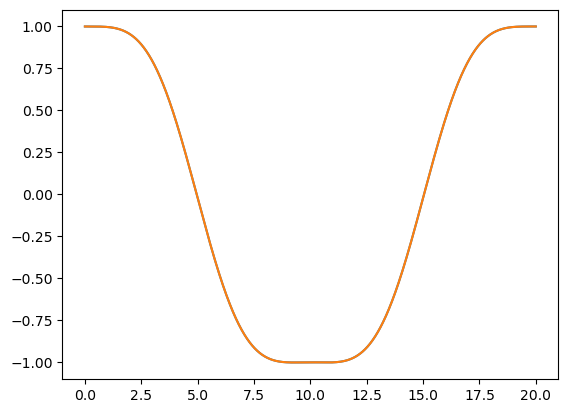

In [114]:
fig, ax =plt.subplots()
fig=plt.plot(np.arange(start=0,stop=20.,step=1e-4), [check[i][0][0].real for i in range(200000)])
fig=plt.plot(np.arange(start=0,stop=20.,step=1e-4), [check2[i][0][0].real for i in range(200000)])

 $H_d(t)=f(t)\sigma_x+g(t)\sigma_y$로 쪼개서 make_U 함수로 $U(t)$를 구했는데 당연히 같은 결과가 나왔다.

 exponential operator가 Taylor expansion 정의되고 operator들은 일반적으로 서로 commute 하지 않음에 주의하자
 $$\exp\Big[i\sigma_x F(t) \Big]=i\sigma_x \cos{\Big(\int_0^t f(t')}dt'\Big)+I\sin \Big( \int_0^t f(t')dt' \Big)
$$ 

$$\exp\Big[i\sigma_x F(t) + i\sigma_y G(t) \Big] \neq \exp\Big[i\sigma_x F(t) \Big] \exp\Big[i\sigma_x F(t) \Big]$$

# Problem 2
## Sequence of pulses converted in to sequence of gate operation
In general matrices does not commute with each other so we need to use time ordering operator $T$

$$U_k...U_1U_ \ = \ T\prod_{n=0}^k \exp \Big[-\frac{i}{\hbar}\int_0^t H^n(t')dt' \Big] $$

계산된 matrix 들은 일반적으로 서로 commute하지 않는다.



pulse sequence가 주어질때 최종 gate operation(matrix)를 구할때는 주어진 순서대로 matrix U를 만들어서 행렬연산을 해줘야한다. 

In [100]:
pulse_sequence=[]